In [34]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image, ImageFilter
import cv2

In [7]:
csv_path = '/opt/ml/input/data/train/train.csv'
train_path = './input/data/train/train.csv'
Image_path = '/opt/ml/input/data/train/images/'

In [4]:
df = pd.read_csv(csv_path)

In [5]:
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [32]:
for i in range(len(df)):
    try:
        im = Image.open(Image_path + df['path'][i] + '/incorrect_mask.jpg')
        im_detail = im.filter(ImageFilter.DETAIL)
        im_detail2 = im.transpose(Image.FLIP_LEFT_RIGHT)
        im_detail3 = im.filter(ImageFilter.SMOOTH)
        im_detail4 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
        im_detail.save(Image_path + df['path'][i] + '/incorrect_mask2.jpg')
        im_detail2.save(Image_path + df['path'][i] + '/incorrect_mask3.jpg')
        im_detail3.save(Image_path + df['path'][i] + '/incorrect_mask4.jpg')
        im_detail4.save(Image_path + df['path'][i] + '/incorrect_mask5.jpg')
    except FileNotFoundError:
        pass
    try:
        im = Image.open(Image_path + df['path'][i] + '/incorrect_mask.jpeg')
        im_detail = im.filter(ImageFilter.DETAIL)
        im_detail2 = im.transpose(Image.FLIP_LEFT_RIGHT)
        im_detail3 = im.filter(ImageFilter.SMOOTH)
        im_detail4 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
        im_detail.save(Image_path + df['path'][i] + '/incorrect_mask2.jpeg')
        im_detail2.save(Image_path + df['path'][i] + '/incorrect_mask3.jpeg')
        im_detail3.save(Image_path + df['path'][i] + '/incorrect_mask4.jpeg')
        im_detail4.save(Image_path + df['path'][i] + '/incorrect_mask5.jpeg')
    except FileNotFoundError:
        pass
    try:
        im = Image.open(Image_path + df['path'][i] + '/incorrect_mask.png')
        im_detail = im.filter(ImageFilter.DETAIL)
        im_detail2 = im.transpose(Image.FLIP_LEFT_RIGHT)
        im_detail3 = im.filter(ImageFilter.SMOOTH)
        im_detail4 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
        im_detail.save(Image_path + df['path'][i] + '/incorrect_mask2.png')
        im_detail2.save(Image_path + df['path'][i] + '/incorrect_mask3.png')
        im_detail3.save(Image_path + df['path'][i] + '/incorrect_mask4.png')
        im_detail4.save(Image_path + df['path'][i] + '/incorrect_mask5.png')
    except FileNotFoundError:
        pass

In [33]:
for i in range(len(df)):
    try:
        im = Image.open(Image_path + df['path'][i] + '/normal.jpg')
        im_detail = im.filter(ImageFilter.DETAIL)
        im_detail2 = im.transpose(Image.FLIP_LEFT_RIGHT)
        im_detail3 = im.filter(ImageFilter.SMOOTH)
        im_detail4 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
        im_detail.save(Image_path + df['path'][i] + '/normal2.jpg')
        im_detail2.save(Image_path + df['path'][i] + '/normal3.jpg')
        im_detail3.save(Image_path + df['path'][i] + '/normal4.jpg')
        im_detail4.save(Image_path + df['path'][i] + '/normal5.jpg')
    except FileNotFoundError:
        pass
    try:
        im = Image.open(Image_path + df['path'][i] + '/normal.jpeg')
        im_detail = im.filter(ImageFilter.DETAIL)
        im_detail2 = im.transpose(Image.FLIP_LEFT_RIGHT)
        im_detail3 = im.filter(ImageFilter.SMOOTH)
        im_detail4 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
        im_detail.save(Image_path + df['path'][i] + '/normal2.jpeg')
        im_detail2.save(Image_path + df['path'][i] + '/normal3.jpeg')
        im_detail3.save(Image_path + df['path'][i] + '/normal4.jpeg')
        im_detail4.save(Image_path + df['path'][i] + '/normal5.jpeg')
    except FileNotFoundError:
        pass
    try:
        im = Image.open(Image_path + df['path'][i] + '/incorrect_mask.png')
        im_detail = im.filter(ImageFilter.DETAIL)
        im_detail2 = im.transpose(Image.FLIP_LEFT_RIGHT)
        im_detail3 = im.filter(ImageFilter.SMOOTH)
        im_detail4 = im.filter(ImageFilter.EDGE_ENHANCE_MORE)
        im_detail.save(Image_path + df['path'][i] + '/incorrect_mask2.png')
        im_detail2.save(Image_path + df['path'][i] + '/incorrect_mask3.png')
        im_detail3.save(Image_path + df['path'][i] + '/incorrect_mask4.png')
        im_detail4.save(Image_path + df['path'][i] + '/incorrect_mask5.png')
    except FileNotFoundError:
        pass

- 바뀐 데이터 확인하기

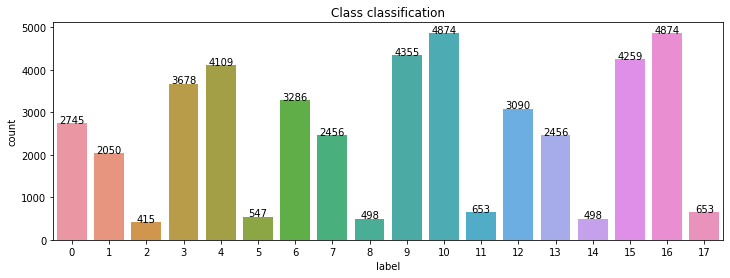

In [42]:
data = pd.DataFrame(columns=['id', 'path', 'label'])

root = '/opt/ml/input/data/train/images/'

for path in df.path:
    name_id, gender, race, age = path.split('_')
    
    age = int(age)
    if age < 30:
        get_age = 0
    elif age < 60:
        get_age = 1
    else:
        get_age = 2
        
    if gender == 'male':
        gender_point = 0
    elif gender == 'female':
        gender_point = 3
        
    for image in list(os.listdir(os.path.join(root, path))):
        # .파일 없애기.. 이거 처음에는 없었던 것 같은데..
        if image[0] == '.':
            continue
        
        # 일반얼굴
#         if image.split('.')[0] == 'normal':
        if 'normal' in image.split('.')[0]:
            label = 12 + get_age + gender_point
            data = data.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
            
#         elif image.split('.')[0] == 'incorrect_mask':
        elif 'incorrect_mask' in image.split('.')[0]:
            label = 6 + get_age + gender_point
            data = data.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
        else:
            label = get_age + gender_point
            data = data.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
            

fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data, x='label', ax=ax)
for num in range(18):
    ax.text(x=num, y=len(data[data['label'] == num]), s=len(data[data['label'] == num]), ha='center')

ax.set_title('Class classification')
plt.show()